In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

####PCA, numpy

In [3]:
iris = load_iris()
X_features = iris.data
y_target = iris.target

In [4]:
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(X_features)
print(iris_scaled.shape)

(150, 4)


In [5]:
cov = np.dot(iris_scaled.T, iris_scaled)  # due to StandardScaling, E(x) == E(y) == 0
print(cov.shape)

(4, 4)


In [6]:
eigenvalues, eigenvectors = np.linalg.eig(cov)
print(eigenvalues)
print(eigenvectors)

[437.77467248 137.10457072  22.01353134   3.10722546]
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [15]:
projected_iris = np.dot(iris_scaled, eigenvectors[:,:2])
print(projected_iris.shape)
print(projected_iris[:10])

(150, 2)
[[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]
 [-2.07563095 -1.48917752]
 [-2.44402884 -0.0476442 ]
 [-2.23284716 -0.22314807]
 [-2.33464048  1.11532768]
 [-2.18432817  0.46901356]]


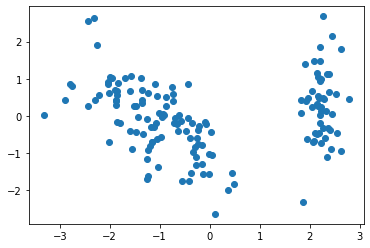

In [14]:
plt.figure()
plt.scatter(projected_iris[:,0], projected_iris[:,1])

####PCA, sklearn.decomposition.pca

In [9]:
from sklearn.decomposition import PCA

pca_ = PCA(n_components=2)
projected_iris2 = pca_.fit_transform(iris_scaled)
print(projected_iris2.shape)
print(projected_iris2[:10])

(150, 2)
[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]]


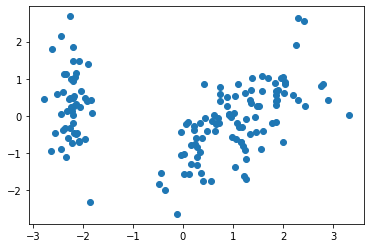

In [10]:
plt.figure()
plt.scatter(projected_iris2[:,0], projected_iris2[:,1])

####SVD, numpy

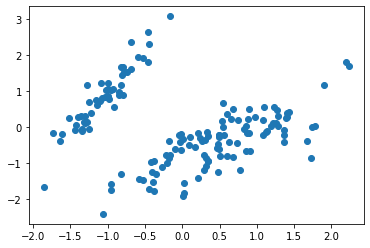

In [11]:
U, Sigma, V = np.linalg.svd(iris_scaled)
compact_iris = np.dot(U[:,:2], np.diag(Sigma)[:2, :2]).dot(V[:2])

plt.figure()
plt.scatter(compact_iris[:,0], compact_iris[:,1])

####TruncatedSVD by linalg SVD

Text(0.5, 1.0, 'Truncated SVD by SVD')

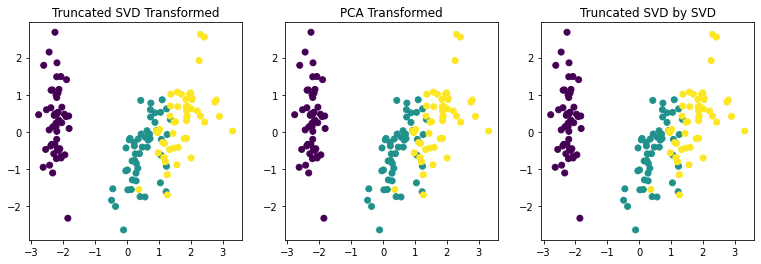

In [12]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# numpy linalg SVD
U, Sigma, Vt = np.linalg.svd(iris_scaled)
iris_tsvd2 = np.dot(U[:,:2], np.diag(Sigma)[:2, :2])
iris_tsvd2[:,1] = -iris_tsvd2[:,1]

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(13, 4), ncols=3)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax3.scatter(x=iris_tsvd2[:,0], y=iris_tsvd2[:,1], c=iris.target)
ax1.set_title("Truncated SVD Transformed")
ax2.set_title("PCA Transformed")
ax3.set_title("Truncated SVD by SVD")


### 참고해  
https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/06/pcasvdlsa/